# **Principal Component Decomposition**


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
import pandas as pd
x = pd.read_csv('dataset_10.csv')
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])

In [ ]:
print(principalDf)

     principal component 1  ...  principal component 5
0                 4.143335  ...              -1.170453
1                49.923272  ...              19.607943
2               -40.487903  ...               3.350777
3                49.702673  ...              19.191944
4               -18.955910  ...              13.064756
..                     ...  ...                    ...
506             -26.872042  ...               4.446755
507              38.392018  ...             -14.777584
508              -0.572606  ...             -12.130223
509             -16.971819  ...              12.898654
510              52.143352  ...              20.057350

[511 rows x 5 columns]


In [ ]:
pca.explained_variance_ratio_


array([33.25172343, 31.44137113, 18.94426791,  7.34932417,  4.6843374 ])

# **GMM Initialisation, silhouette score**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import mixture
from sklearn import metrics # for calculating Silhouette score

np.random.seed(1)
df = pd.read_csv('dataset_10.csv',header=None)
from sklearn.model_selection import train_test_split
g = mixture.GaussianMixture(n_components = 8)
train, test = train_test_split(df)
train = np.array(train.values)
test = np.array(test.values)

In [ ]:
S=[]

# Range of clusters to try (2 to 10)
K=range(2,11)

# Select data for clustering model
X = df

for k in K:
    # Set the model and its parameters
    model = mixture.GaussianMixture(n_components=k, n_init=20, init_params='kmeans')
    # Fit the model 
    labels = model.fit_predict(X)
    # Calculate Silhoutte Score and append to a list
    S.append(metrics.silhouette_score(X, labels, metric='euclidean'))
print(S)

[0.36647195567960084, 0.3810730505640446, 0.5542226743320615, 0.6739219393100614, 0.7446657221760186, 0.8308178566613001, 0.9166957190188021, 0.8170752887381739, 0.7275288937806323]


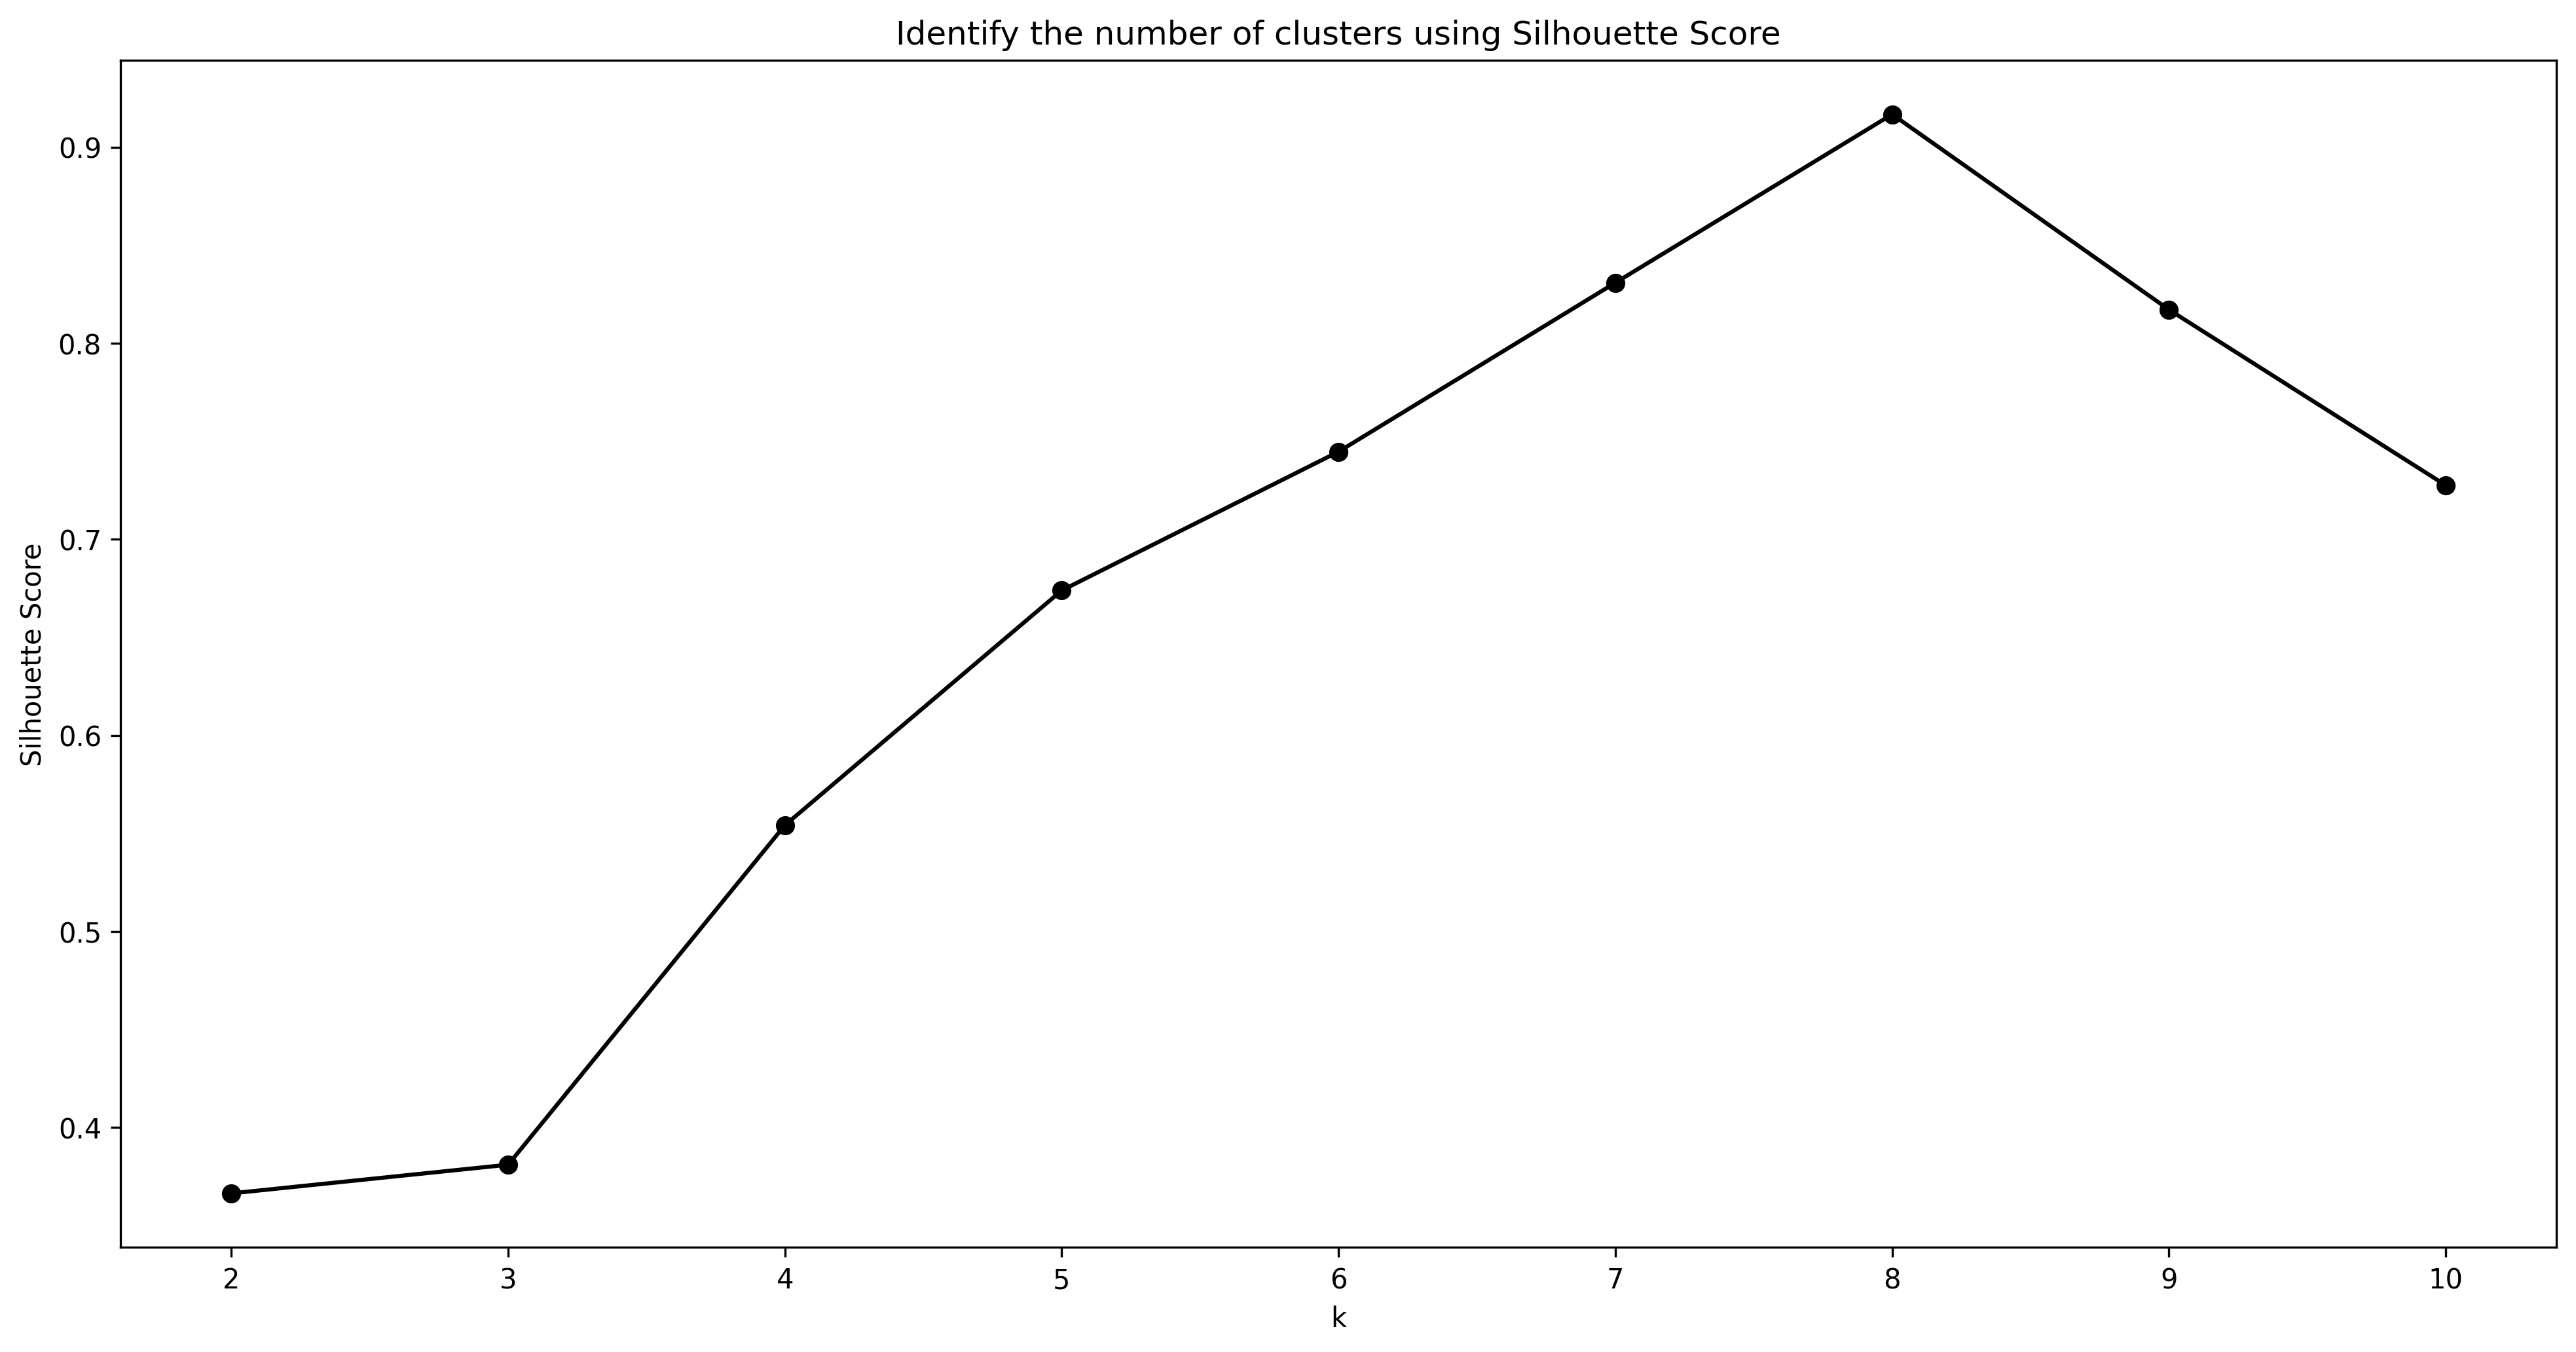

In [ ]:
import matplotlib.pyplot as plt # for data visualization

plt.figure(figsize=(16,8), dpi=300)
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

# **GMM Fitting with 8 clusters**

In [ ]:
model = mixture.GaussianMixture(n_components=8, n_init=20, init_params='kmeans')
label = model.fit_predict(X)
metrics.silhouette_score(X, labels, metric='euclidean')

0.7275288937806323

Why is the silhouette score different lmao?


# **Task 2: Regression**#

In [156]:
import pandas as pd
import numpy as np
task2 = pd.read_csv('train.csv')
task2 = pd.DataFrame(task2)
from sklearn.datasets import make_regression
from sklearn import preprocessing
from sklearn import metrics # for calculating Silhouette score
from sklearn.model_selection import train_test_split
from sklearn import neural_network
X = np.array(task2.iloc[:,0])
X = preprocessing.scale(X)
target = np.array(task2.iloc[:,2])


X_train, X_test, y_train, y_test = train_test_split(X, target)

#for k in range(1,100):
model = neural_network.MLPRegressor(solver = 'sgd', hidden_layer_sizes=3)
model.fit(X_train.reshape(-1,1), y_train)
pred = model.predict(X_test.reshape(-1,1))
abs(model.score(X_test.reshape(-1,1), y_test))

0.20800669609579447

In [155]:
import sklearn
abs(sklearn.model_selection.cross_val_score(model, X.reshape(-1,1), target))

array([0.32985439, 0.17552772, 0.13696563, 0.26727424, 0.1902106 ])

In [151]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test.reshape(-1,1))
accuracy_score(y_test, y_pred)